# Laptop Prices Prediction Model

In [1]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [2]:
data = pd.read_csv("../data/Laptop_price.csv")
data.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [3]:
# missing values
data.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [5]:
# statistical overview
data.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [6]:
# shape
data.shape

(1000, 7)

In [7]:
# brands
print(data["Brand"].nunique())
print(data["Brand"].unique())

5
['Asus' 'Acer' 'Lenovo' 'HP' 'Dell']


In [8]:
data.duplicated().sum()

np.int64(0)

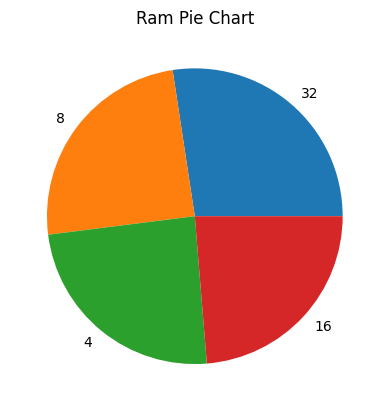

In [9]:
data["RAM_Size"].value_counts().sort_values(ascending=False).plot(kind="pie")
plt.title("Ram Pie Chart")
plt.ylabel("")
plt.show()


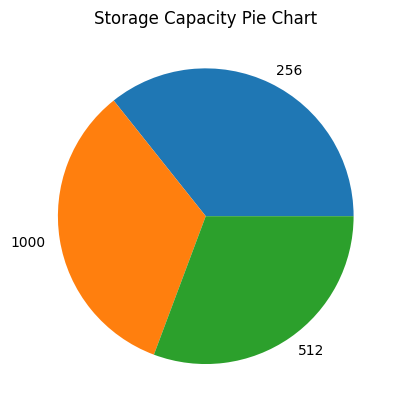

In [10]:
data["Storage_Capacity"].value_counts().sort_values(ascending=False).plot(kind="pie")
plt.title("Storage Capacity Pie Chart")
plt.ylabel("")
plt.show()

In [11]:
data["Screen_Size"].value_counts()

Screen_Size
11.185147    1
11.311372    1
11.853023    1
12.280360    1
14.990877    1
            ..
12.587095    1
12.679356    1
12.666315    1
11.215581    1
16.561498    1
Name: count, Length: 1000, dtype: int64

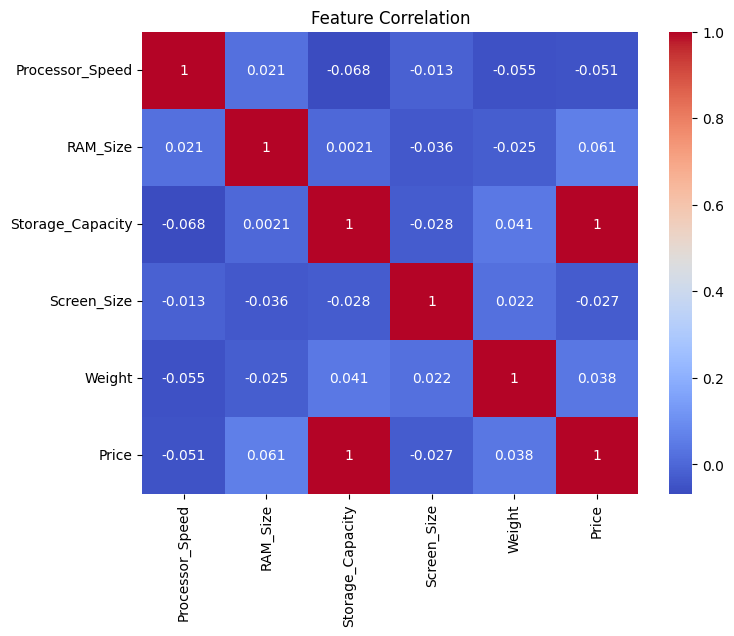

In [12]:
# Correlation heatmap (numeric only)
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [13]:
# features and labels selection
X, y = data.drop("Price", axis=1), data["Price"]
X.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight
0,Asus,3.830296,16,512,11.185147,2.641094
1,Acer,2.912833,4,1000,11.311372,3.260012
2,Lenovo,3.241627,4,256,11.853023,2.029061
3,Acer,3.806248,16,512,12.280360,4.573865
4,Acer,3.268097,32,1000,14.990877,4.193472


In [14]:
y

0      17395.093065
1      31607.605919
2       9291.023542
3      17436.728334
4      32917.990718
           ...     
995    31593.668017
996     9149.521832
997    16552.404779
998     9407.473459
999     8807.696702
Name: Price, Length: 1000, dtype: float64

In [15]:
# preprocessing
categorical_features = ['Brand']
numeric_features = ['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [17]:
# model comparison
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

models_and_params = {
    "Random Forest": (
        RandomForestRegressor(random_state=42),
        {
            'regressor__n_estimators': [100, 200],
            'regressor__max_depth': [None, 10, 20],
            'regressor__min_samples_split': [2, 5]
        }
    ),
    "Gradient Boosting": (
        GradientBoostingRegressor(random_state=42),
        {
            'regressor__n_estimators': [100, 200],
            'regressor__max_depth': [3, 5],
            'regressor__learning_rate': [0.05, 0.1]
        }
    ),
    "Decision Tree": (
        DecisionTreeRegressor(random_state=42),
        {
            'regressor__max_depth': [3, 5, None],
            'regressor__min_samples_split': [2, 5, 10]
        }
    ),
    "Ridge": (
        Ridge(),
        {
            'regressor__alpha': [0.1, 1, 10]
        }
    ),
    "Lasso": (
        Lasso(max_iter=5000),
        {
            'regressor__alpha': [0.01, 0.1, 1, 10]
        }
    ),
    "ElasticNet": (
        ElasticNet(max_iter=5000),
        {
            'regressor__alpha': [0.01, 0.1, 1],
            'regressor__l1_ratio': [0.1, 0.5, 0.9]
        }
    ),
    "SVR": (
        SVR(),
        {
            'regressor__C': [0.1, 1, 10],
            'regressor__kernel': ['linear', 'rbf']
        }
    )
}

print("\nModel comparison (5-folds CV MAE):")
results = {}

for name, (model, param_grid) in models_and_params.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
    grid = GridSearchCV(pipe, param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    best_mae = -grid.best_score_
    results[name] = (best_mae, grid.best_estimator_, grid.best_params_)
    print(f"{name}: {best_mae:.4f} MAE | Best Params: {grid.best_params_}")

# picking the best model
best_model_name = min(results, key=lambda k: results[k][0])
best_mae, best_estimator, best_params = results[best_model_name]

print(f"\nBest Model: {best_model_name} with MAE: {best_mae:.4f}")

# === Final evaluation on test set ===
y_pred = best_estimator.predict(X_test)

print("\nFinal Model Performance on Test Set:")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
# print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.4f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")


Model comparison (5-folds CV MAE):


Random Forest: 180.6781 MAE | Best Params: {'regressor__max_depth': 10, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}
Gradient Boosting: 163.5344 MAE | Best Params: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 100}
Decision Tree: 198.0285 MAE | Best Params: {'regressor__max_depth': 5, 'regressor__min_samples_split': 10}
Ridge: 157.3262 MAE | Best Params: {'regressor__alpha': 1}
Lasso: 157.2435 MAE | Best Params: {'regressor__alpha': 1}
ElasticNet: 157.2384 MAE | Best Params: {'regressor__alpha': 0.01, 'regressor__l1_ratio': 0.9}
SVR: 3436.5386 MAE | Best Params: {'regressor__C': 10, 'regressor__kernel': 'linear'}

Best Model: ElasticNet with MAE: 157.2384

Final Model Performance on Test Set:
MAE: 146.4020
R²: 0.9996


In [18]:
data.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [23]:
# predictive system
def predict_price(input_data, model_pipeline):
    return model_pipeline.predict(input_data)

# Example single laptop features (make sure columns match exactly)
new_laptop = pd.DataFrame({
    'Brand': [''],
    'Processor_Speed': [2.5],
    'RAM_Size': [16],
    'Storage_Capacity': [512],
    'Screen_Size': [15.6],
    'Weight': [2.0]
})

predicted_price = predict_price(new_laptop, best_estimator)
print(f"Predicted Laptop Price: ${predicted_price[0]:.2f}")


Predicted Laptop Price: $17441.28


In [24]:
# saving the model
model = best_estimator

with open("model.sav", "wb") as f:
    pickle.dump(model, f)


## Best Model: ElasticNet with MAE: 157.2384